<hr>
<p><font color='crimson'><h1 align="center">Générez des cartes de vœux avec Pandas</h1></font><a
                                                                                                 href="https://openclassrooms.com/fr/courses/4452741-decouvrez-les-librairies-python-pour-la-datascience/exercises/3040#/step1">Lien vers l'énoncé</a>.</p>

<h2><font color='palevioletred'>Scénario</font></h2>
Vous avez une idée de start-up ! Vous souhaitez vendre des cartes de vœux pour les anniversaires... Ca parait simple, mais attention, il y a un twist !

Vous voulez faire un type de cartes de vœux pour le jour de la semaine de naissance du destinataire. Vous aurez ainsi 7 types de cartes différents.

<h2><font color='palevioletred'>Les données</font></h2>
Vous aimeriez prévoir la quantité de cartes à créer. Malheureusement, vous ne savez pas quelle quantité commander pour chaque jour. Mais vous avez accès aux données de naissance aux États-Unis dans ce </font><a href="http://www.pnas.org/content/15/3/168.full">fichier</a>.</p> (eh oui, vous partez directement à l'international !)

<h2><font color='palevioletred'>Solution proposée</font></h2>

In [1]:
#Importation des librairies nécessaires
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Importation des données
df=pd.read_csv("https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv")

<h3><font color='cadetblue'>Visualisation des données</font></h3>

In [3]:
df.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [4]:
df.describe(include="all")

,year,month,day,gender,births
count,15547.000000,15547.000000,15067.000000,15547,15547.000000
unique,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,F,NaN
freq,NaN,NaN,NaN,7776,NaN
mean,1979.037435,6.515919,17.769894,NaN,9762.293561
std,6.728340,3.449632,15.284034,NaN,28552.465810
min,1969.000000,1.000000,1.000000,NaN,1.000000
25%,1974.000000,4.000000,8.000000,NaN,4358.000000
50%,1979.000000,7.000000,16.000000,NaN,4814.000000
75%,1984.000000,10.000000,24.000000,NaN,5289.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
year      15547 non-null int64
month     15547 non-null int64
day       15067 non-null float64
gender    15547 non-null object
births    15547 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


In [6]:
#Savoir s'il y a des Nans 
df.isnull().values.any()

True

<h3><font color='cadetblue'>Nettoyage de données</font></h3>

In [7]:
#On supprime les lignes contenants des Nans
df=df.dropna()
#Modifier les valeurs du colonne 'day' en entier
df["day"]=df["day"].astype(int)
#Supprimer les lignes où les jours supérieures à 31 ou négatives
df=df.drop(df[(df["day"]>31)|(df["day"]<1)].index)


df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14717 entries, 0 to 15066
Data columns (total 5 columns):
year      14717 non-null int64
month     14717 non-null int64
day       14717 non-null int32
gender    14717 non-null object
births    14717 non-null int64
dtypes: int32(1), int64(3), object(1)
memory usage: 632.4+ KB


In [8]:
df.index=pd.to_datetime(10000 * df.year +100 * df.month +df.day, format='%Y%m%d',errors='coerce')

In [9]:
df.head()

,year,month,day,gender,births
1969-01-01,1969,1,1,F,4046
1969-01-01,1969,1,1,M,4440
1969-01-02,1969,1,2,F,4454
1969-01-02,1969,1,2,M,4548
1969-01-03,1969,1,3,F,4548


In [10]:
df.tail()

,year,month,day,gender,births
1988-12-29,1988,12,29,M,5944
1988-12-30,1988,12,30,F,5742
1988-12-30,1988,12,30,M,6095
1988-12-31,1988,12,31,F,4435
1988-12-31,1988,12,31,M,4698


<h3><font color='cadetblue'>Suite du Travail</font></h3>

In [11]:
df['dayofweek']=df.index.dayofweek
df=df.dropna()
df['dayofweek']=df['dayofweek'].astype(int)
df.head()

,year,month,day,gender,births,dayofweek
1969-01-01,1969,1,1,F,4046,2
1969-01-01,1969,1,1,M,4440,2
1969-01-02,1969,1,2,F,4454,3
1969-01-02,1969,1,2,M,4548,3
1969-01-03,1969,1,3,F,4548,4


In [12]:
df['day_of_week'] = df.index.weekday_name
df.head()

,year,month,day,gender,births,dayofweek,day_of_week
1969-01-01,1969,1,1,F,4046,2,Wednesday
1969-01-01,1969,1,1,M,4440,2,Wednesday
1969-01-02,1969,1,2,F,4454,3,Thursday
1969-01-02,1969,1,2,M,4548,3,Thursday
1969-01-03,1969,1,3,F,4548,4,Friday


In [13]:
def decade(year):
    return 10*(year//10)

df['decade']=decade(df['year'])
df.head()

,year,month,day,gender,births,dayofweek,day_of_week,decade
1969-01-01,1969,1,1,F,4046,2,Wednesday,1960
1969-01-01,1969,1,1,M,4440,2,Wednesday,1960
1969-01-02,1969,1,2,F,4454,3,Thursday,1960
1969-01-02,1969,1,2,M,4548,3,Thursday,1960
1969-01-03,1969,1,3,F,4548,4,Friday,1960


In [14]:
dg=df[['decade','day_of_week','births']].groupby(['decade','day_of_week']).sum()

Text(0.5, 1.0, 'whitegrid')

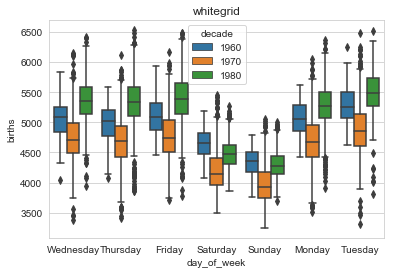

In [15]:
sns.set_style("whitegrid")
sns.boxplot(x='day_of_week',y='births',hue='decade',data=df)
plt.title("whitegrid")

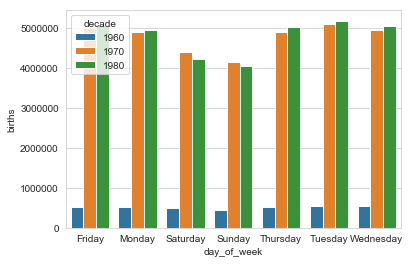

In [16]:
sns.barplot(x='day_of_week', y='births', data=dg.reset_index(),hue='decade')

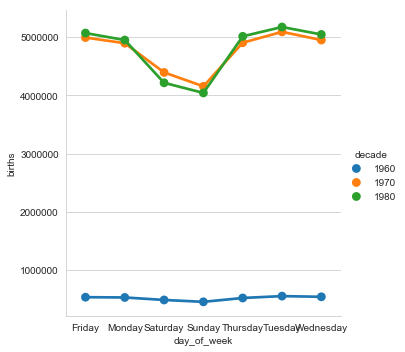

In [17]:
sns.catplot(x="day_of_week", y="births",  hue="decade", kind="point", data=dg.reset_index())

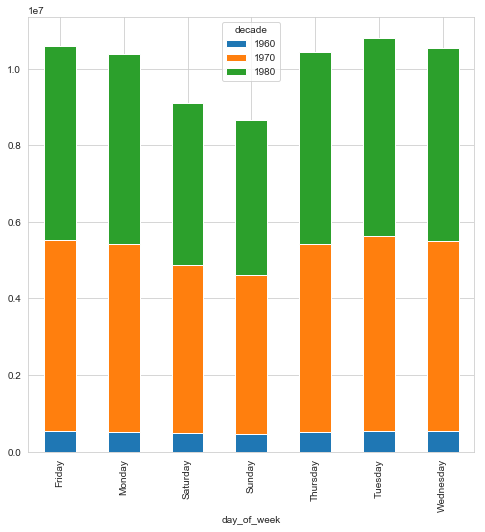

In [18]:
dg.reset_index().pivot(index='day_of_week',values='births',columns='decade').plot(kind='bar',stacked=True,figsize=(8,8))

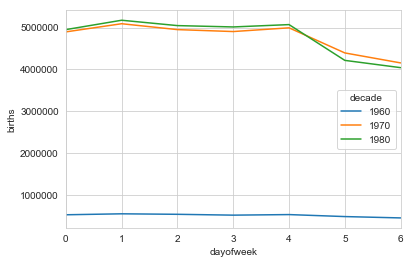

In [19]:
df.pivot_table('births', index='dayofweek',columns='decade', aggfunc='sum').plot()
plt.ylabel('births');

<h4><font color='green'>NB:</font></h4>
C'est vrai que les résultats obtenues sont claires mais on peut travailler avec le nombre moyen de naissances par jour :

In [20]:
dq=df[['decade','day_of_week','births']].groupby(['decade','day_of_week']).mean()
dq=dq.rename(columns={"births":"moyen births per day"})
dq.head()

moyen births per day
decade day_of_week                      
1960   Friday                5107.884615
       Monday                5063.826923
       Saturday              4651.057692
       Sunday                4342.346154
       Thursday              4978.288462

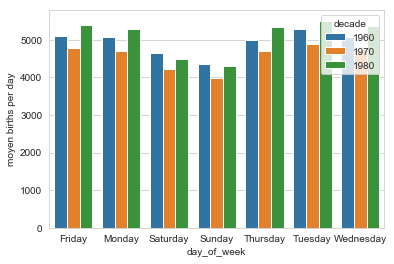

In [21]:
sns.barplot(x='day_of_week', y='moyen births per day', data=dq.reset_index(),hue='decade')

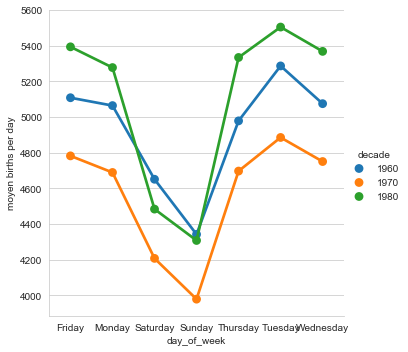

In [22]:
sns.catplot(x="day_of_week", y="moyen births per day",  hue="decade", kind="point", data=dq.reset_index())

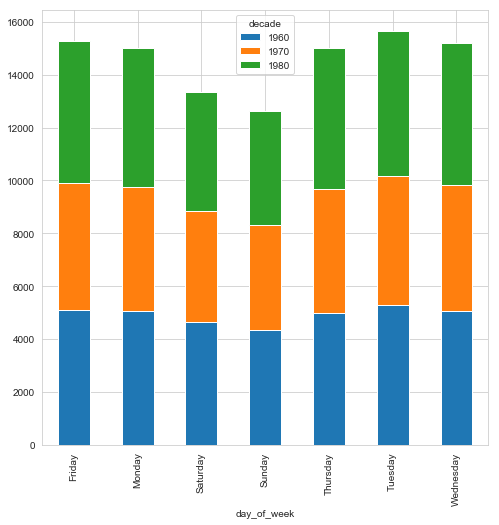

In [23]:
dq.reset_index().pivot(index='day_of_week',values='moyen births per day',columns='decade').plot(kind='bar',stacked=True,figsize=(8,8))

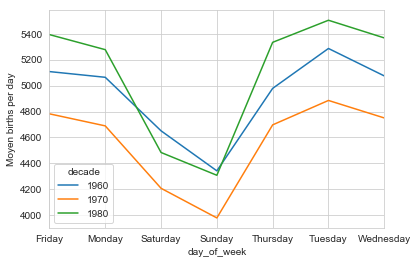

In [24]:
df.pivot_table('births', index='day_of_week',columns='decade', aggfunc='mean').plot()
plt.ylabel('Moyen births per day');